### FE: Analisis de Descripciones

In [97]:
import pandas as pd
df = pd.read_csv("./train.csv")

#### Vemos que hay nulos pero son muy pocos en comparacion a todos los anuncios que hay

In [98]:
x = df['descripcion'].isna().sum() / df['descripcion'].size * 100
print("Porcentaje de Nulidad: "+ str(x) + "%")

Porcentaje de Nulidad: 0.6745833333333334%


#### Entonces nos atrevemos a encontrar posibles valores repetidos en las descripciones que puedan ser features escondidas, éstas son las funciones a utilizar

### OPTIMIZACION DE LAS FUNCIONES EMPLEADAS

In [99]:
def contar_palabras(descripcion, palabras):
    
    contadas = 0
    
    for palabra in palabras:
        spliteado = descripcion.split()
        contadas += spliteado.count(palabra)
        
    return contadas

In [100]:
def normalizar_descripciones(descripcion):
    
    descripcion = descripcion.replace(',', ' ')
    descripcion = descripcion.replace('.', ' ')
    descripcion = descripcion.replace('<', ' ')
    descripcion = descripcion.replace('>', ' ')
    descripcion = descripcion.replace('\n', ' ')
    descripcion = descripcion.replace('\strong', ' ')
    descripcion = descripcion.replace('\bold', ' ')
    descripcion = descripcion.lower()
    
    return descripcion

#### Hay que remover los nulos y aplicar la normalizacion primero

In [101]:
df['descripcion'] = df['descripcion'].fillna(value = ".")
df['descripcion'] = df['descripcion'].apply(normalizar_descripciones)

### - COMIENZA ANALISIS -

In [103]:
df['suite'] = df['descripcion'].apply(contar_palabras, palabras=["suite"])
df['suite'].value_counts()

0    239539
1       395
2        54
3         8
5         2
4         2
Name: suite, dtype: int64

In [126]:
df['avenida'] = df['descripcion'].apply(contar_palabras, palabras=["avenida", "av", "avenidas", "bulevar", 
                                                                   "boulevard", "paseo", "vía"])

df.avenida.value_counts()

0     216355
1      19612
2       3194
3        592
4        152
5         53
6         26
8          6
7          4
11         2
10         2
23         1
9          1
Name: avenida, dtype: int64

In [128]:
df['gim'] = df['descripcion'].apply(contar_palabras, palabras=["gimnasio", "gimnásio", "entrenamiento", 
                                                                    "gim", "gym", "fit", "ejercicio", "gimnasia",
                                                              "atletismo", "cancha"])
df.gim.value_counts()

0    223596
1     13681
2      2223
3       411
4        81
5         7
6         1
Name: gim, dtype: int64

In [106]:
#Original
df['gimnasio'].value_counts()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [107]:
df['cochera'] = df['descripcion'].apply(contar_palabras, palabras=["cochera", "cocheras", "garage", 
                                                                   "garages", "garaje", "garajes"])

df.cochera.value_counts()

0     180603
1      56457
2       2688
3        205
4         36
6          7
5          3
12         1
Name: cochera, dtype: int64

In [108]:
#Original
df.garages.value_counts()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [109]:
df['ubicacion'] = df['descripcion'].apply(contar_palabras, palabras=["ubicacion", "ubicación", "locacion", 
                                                                   "locación", "localizacion", "localización",
                                                                    "ubicado", "ubicada", "centro", "centrico",
                                                                     "centrica", "céntrico", "céntrica"])

df.ubicacion.value_counts()

0     167895
1      60602
2       9849
3       1325
4        247
5         49
6         19
7          6
8          4
9          2
13         1
10         1
Name: ubicacion, dtype: int64

In [110]:
df['balcon'] = df['descripcion'].apply(contar_palabras, palabras=["balcon", "balcón", "terraza", 
                                                                  "palco", "mirador", "balconcillo",
                                                                  "azotea", "solana"])

df.balcon.value_counts()

0     188938
1      41476
2       7646
3       1403
4        342
5        127
6         42
7          8
8          7
9          5
10         3
18         1
13         1
12         1
Name: balcon, dtype: int64

In [111]:
df['camaraseg'] = df['descripcion'].apply(contar_palabras, palabras=["camara", "cámara", "cámaras", "camaras"])

df.camaraseg.value_counts()

0    238285
1      1687
2        26
3         2
Name: camaraseg, dtype: int64

In [112]:
df['parque'] = df['descripcion'].apply(contar_palabras, palabras=["parque", "plaza", "plazoleta", "glorieta"])

df.parque.value_counts()

0    221166
1     16006
2      2344
3       357
4        91
5        22
6         6
8         3
7         3
9         2
Name: parque, dtype: int64

In [113]:
df['amoblado'] = df['descripcion'].apply(contar_palabras, palabras=["muebles", "amoblado", "mueble"])

df.amoblado.value_counts()

0     234602
1       4859
2        445
3         68
4         13
6          6
5          5
11         1
8          1
Name: amoblado, dtype: int64

In [114]:
df['bañera'] = df['descripcion'].apply(contar_palabras, palabras=["bañera", "hidromasaje", "hidro", "tina"])

df.bañera.value_counts()

0    234592
1      3640
2      1666
3        61
4        38
6         2
5         1
Name: bañera, dtype: int64

In [115]:
df['nuevo'] = df['descripcion'].apply(contar_palabras, palabras=["nuevo", "nueva", "estrenar"])

df.nuevo.value_counts()

0    217858
1     19884
2      1993
3       209
4        42
5         6
6         4
8         2
9         1
7         1
Name: nuevo, dtype: int64

In [116]:
df['transporte'] = df['descripcion'].apply(contar_palabras, palabras=["subte", "subterraneo", "subterráneo",
                                                                     "metro", "estacion", "estación", "tren",
                                                                     "subestacion", "subestación", "ferrocarril",
                                                                     "metrobús", "metrobus", "trolebus",
                                                                     "trolebús", "bus", "bús"])

df.transporte.value_counts()

0    231893
1      6117
2      1616
3       287
4        65
5        16
6         6
Name: transporte, dtype: int64

In [117]:
df['pileta'] = df['descripcion'].apply(contar_palabras, palabras=["piscina", "pileta", "nado"])
                                       
df.piscina.value_counts()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [118]:
df['lujo'] = df['descripcion'].apply(contar_palabras, palabras=["lujo", "delujo", "deluxe", 
                                                                "delúxe", "lujosa", "lujoso", 
                                                                "lujosas", "lujosos"])
df['lujo'].value_counts()

0    227174
1     11527
2      1086
3       160
4        31
5        18
6         4
Name: lujo, dtype: int64

In [119]:
df['humilde'] = df['descripcion'].apply(contar_palabras, palabras=["humilde", "economico", "economica", 
                                                                "económico", "económica", "barata", 
                                                                "barato", "accesible", "baratillo",
                                                                "baratilla", "rebajado", "ganga", 
                                                               "asequible", "módico", "módica"])
df['humilde'].value_counts()

0    238565
1      1394
2        41
Name: humilde, dtype: int64

In [120]:
df['ventana'] = df['descripcion'].apply(contar_palabras, palabras=["ventana", "ventanas", 
                                                                   "vista", "ventanal"])

df['ventana'].value_counts()

0     210572
1      25068
2       3402
3        636
4        182
5         76
6         38
8         14
7          5
13         4
9          2
12         1
Name: ventana, dtype: int64

In [121]:
df['precios'] = df['descripcion'].apply(contar_palabras, palabras=["reciente", "recien", "recién",
                                                                  "nueva", "nuevo", "nuevas", "nuevos",
                                                                  "estrenar"])

df['precios'].value_counts()

0     210846
1      25273
2       3169
3        480
4        168
5         34
7         11
6         11
8          3
9          2
14         1
11         1
10         1
Name: precios, dtype: int64

In [122]:
df['luz'] = df['descripcion'].apply(contar_palabras, palabras=["luz", "luminoso", "luminosa",
                                    "claridad", "luminiscencia", "luminosidad", "iluminación",
                                                              "iluminacion"])

df['luz'].value_counts()

0    223863
1     14939
2       987
3       169
4        27
5         9
6         6
Name: luz, dtype: int64

In [123]:
df['bueno'] = df['descripcion'].apply(contar_palabras, palabras=["bueno", "buena", "buenas", "buenos",
                                                                "excelente", "excelentes"])

df['bueno'].value_counts()

0    160695
1     63765
2     12991
3      2158
4       317
5        50
6        19
7         4
8         1
Name: bueno, dtype: int64

In [124]:
df['malo'] = df['descripcion'].apply(contar_palabras, palabras=["malo", "mala", "feo", "fea"])

df['malo'].value_counts()

0    239996
1         4
Name: malo, dtype: int64

In [125]:
df['contable'] = df['descripcion'].apply(contar_palabras, palabras=["precio"])

df['contable'].value_counts()

0     219551
1      17844
2       2141
3        342
4         82
5         18
6          9
10         3
8          3
26         1
16         1
14         1
12         1
11         1
9          1
7          1
Name: contable, dtype: int64

In [135]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [136]:
def mi_split (df):

    X = df.drop(['precio'], axis = 1)
    Y = df['precio']
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.35)
    return x_train, x_test, y_train, y_test

from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn import preprocessing

def minmax(serie):
    
    return (serie-serie.min())/(serie.max()-serie.min())

def mean_target_encoding(train, nombrefeat, nombretarget):
    
    temp = train.groupby(nombrefeat)[nombretarget].transform(np.mean)
    train[nombrefeat + "_mean"]=(temp-temp.min())/(temp.max()-temp.min())
    
    return train

def mean_target_decoding(x_test, nombrefeat, x_train):
    
    nombrefeatmean = nombrefeat + "_mean"
    
    temp = x_train.loc[:,[nombrefeat,nombrefeatmean]]
    temp = temp.set_index(nombrefeat)
    temp = temp.drop_duplicates()
    temp = temp.T.squeeze()
    values = x_test[nombrefeat].map(temp)
    x_test[nombrefeatmean] = values 

    return x_test

def armar_set_2(train):
    
    #Puedo resolver de forma general las que son iguales para train y test
    #es decir, aquellas que no filtran informacion a los de validacion
    
    train = train.drop(['descripcion', 'titulo', 'direccion', 'fecha', 'id'], axis = 1)
    
    #Adiciono servicios
    train['servicios'] = train['piscina'] + train['gimnasio'] + train['usosmultiples']
    
    #"Normalizo" la antiguedad
    #train['antiguedad'] = minmax(train['antiguedad'])
    
    #Elimino los residuos
    train = train.drop(['piscina', 'gimnasio','usosmultiples','escuelascercanas', 
                        'centroscomercialescercanos'], axis = 1)
    
    #Hago el split                    
    x_train, x_test, y_train, y_test = mi_split(train)
        
    x_train["precio"] = y_train

    
    #Calculo los mean target
    x_train_mean = mean_target_encoding(x_train, "provincia", "precio")
    x_train_mean['precio'] = y_train
    x_train_mean = mean_target_encoding(x_train_mean, "tipodepropiedad", "precio")
    x_train_mean = mean_target_encoding(x_train_mean, "ciudad", "precio")
    
    #Se los asigno a los test (NO LOS CALCULO CON ELLOS!!!!!!)
    x_test = mean_target_decoding(x_test, "provincia", x_train_mean)
    x_test = mean_target_decoding(x_test, "tipodepropiedad", x_train_mean)
    x_test = mean_target_decoding(x_test, "ciudad", x_train_mean)

    backup = x_train_mean
    
    x_train = x_train_mean.drop(["precio","provincia","tipodepropiedad","ciudad"], axis=1)
    x_test.drop(["provincia","tipodepropiedad", "ciudad"], axis=1, inplace = True)

    
    return x_train, x_test, y_train, y_test, backup

In [138]:
df = df.dropna()
x_train, x_test, y_train, y_test, backup = armar_set_2(df)

X,y = x_train, y_train
selector = SelectKBest(k='all').fit(X,y)
x_new = selector.transform(X)
scores = selector.scores_
columnas = x_train.columns

Text(0, 0.5, 'Score')

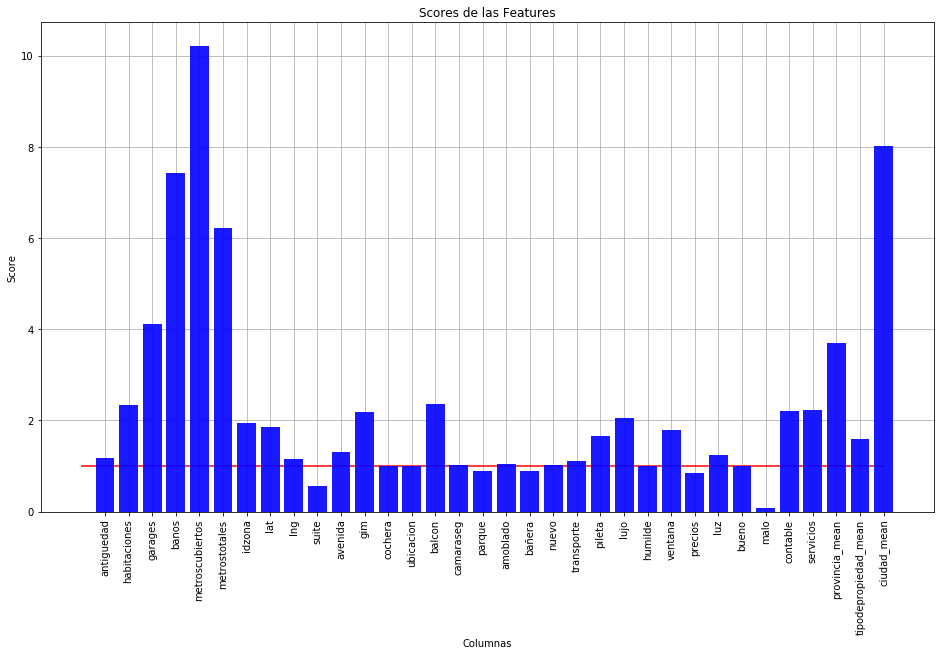

In [195]:
k_utilizado = np.arange(columnas.size)+1


plt.grid()
plt.bar(k_utilizado, scores, color = 'blue', align='center', alpha=0.9, zorder =3)
plt.xticks(k_utilizado, columnas, rotation=90)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.hlines(1, xmin=0, xmax = 34,colors='red', linestyles='solid', label='')
plt.title("Scores de las Features")
plt.xlabel("Columnas")
plt.ylabel("Score")

In [150]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eval_metric='mae',
             gamma=0.016666666666666666, importance_type='gain',
             learning_rate=0.022222222222222223, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=None, n_estimators=1100, n_jobs=1,
             nthread=-1, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7333333333333333, verbosity=1)

xgb_model.fit(x_train, y_train)
prediccion = xgb_model.predict(x_test)

/home/lorenzo/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:59:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [151]:
print(mean_absolute_error(y_test, prediccion))

448802.09828784206


### Hermoso MAE, armo el test

In [154]:
x_test = pd.read_csv("test.csv")

In [155]:
df = x_test

#### Hay que remover los nulos y aplicar la normalizacion primero

In [156]:
df['descripcion'] = df['descripcion'].fillna(value = ".")
df['descripcion'] = df['descripcion'].apply(normalizar_descripciones)

### - COMIENZA ANALISIS -

In [157]:
df['suite'] = df['descripcion'].apply(contar_palabras, palabras=["suite"])
df['suite'].value_counts()

0    59889
1       93
2       12
3        5
4        1
Name: suite, dtype: int64

In [158]:
df['avenida'] = df['descripcion'].apply(contar_palabras, palabras=["avenida", "av", "avenidas", "bulevar", 
                                                                   "boulevard", "paseo", "vía"])

df.avenida.value_counts()

0    54142
1     4831
2      813
3      155
4       31
5       14
6        6
7        5
9        2
8        1
Name: avenida, dtype: int64

In [159]:
df['gim'] = df['descripcion'].apply(contar_palabras, palabras=["gimnasio", "gimnásio", "entrenamiento", 
                                                                    "gim", "gym", "fit", "ejercicio", "gimnasia",
                                                              "atletismo", "cancha"])
df.gim.value_counts()

0    55889
1     3406
2      571
3      109
4       22
5        3
Name: gim, dtype: int64

In [160]:
#Original
df['gimnasio'].value_counts()

0.0    56181
1.0     3819
Name: gimnasio, dtype: int64

In [161]:
df['cochera'] = df['descripcion'].apply(contar_palabras, palabras=["cochera", "cocheras", "garage", 
                                                                   "garages", "garaje", "garajes"])

df.cochera.value_counts()

0    45238
1    14064
2      634
3       52
4       10
6        1
5        1
Name: cochera, dtype: int64

In [162]:
#Original
df.garages.value_counts()

2.0    23538
1.0    14864
0.0     6779
3.0     5496
Name: garages, dtype: int64

In [163]:
df['ubicacion'] = df['descripcion'].apply(contar_palabras, palabras=["ubicacion", "ubicación", "locacion", 
                                                                   "locación", "localizacion", "localización",
                                                                    "ubicado", "ubicada", "centro", "centrico",
                                                                     "centrica", "céntrico", "céntrica"])

df.ubicacion.value_counts()

0    41935
1    15181
2     2476
3      318
4       64
5       17
6        6
9        1
8        1
7        1
Name: ubicacion, dtype: int64

In [164]:
df['balcon'] = df['descripcion'].apply(contar_palabras, palabras=["balcon", "balcón", "terraza", 
                                                                  "palco", "mirador", "balconcillo",
                                                                  "azotea", "solana"])

df.balcon.value_counts()

0     47358
1     10213
2      1923
3       354
4       103
5        30
6        10
8         4
7         2
12        1
10        1
9         1
Name: balcon, dtype: int64

In [165]:
df['camaraseg'] = df['descripcion'].apply(contar_palabras, palabras=["camara", "cámara", "cámaras", "camaras"])

df.camaraseg.value_counts()

0    59529
1      454
2       13
3        4
Name: camaraseg, dtype: int64

In [166]:
df['parque'] = df['descripcion'].apply(contar_palabras, palabras=["parque", "plaza", "plazoleta", "glorieta"])

df.parque.value_counts()

0    55237
1     4049
2      589
3       91
4       21
5        7
6        6
Name: parque, dtype: int64

In [167]:
df['amoblado'] = df['descripcion'].apply(contar_palabras, palabras=["muebles", "amoblado", "mueble"])

df.amoblado.value_counts()

0    58700
1     1171
2       97
3       22
4        7
5        3
Name: amoblado, dtype: int64

In [168]:
df['bañera'] = df['descripcion'].apply(contar_palabras, palabras=["bañera", "hidromasaje", "hidro", "tina"])

df.bañera.value_counts()

0    58682
1      886
2      410
3       12
4        9
6        1
Name: bañera, dtype: int64

In [169]:
df['nuevo'] = df['descripcion'].apply(contar_palabras, palabras=["nuevo", "nueva", "estrenar"])

df.nuevo.value_counts()

0    54547
1     4891
2      488
3       63
4       11
Name: nuevo, dtype: int64

In [170]:
df['transporte'] = df['descripcion'].apply(contar_palabras, palabras=["subte", "subterraneo", "subterráneo",
                                                                     "metro", "estacion", "estación", "tren",
                                                                     "subestacion", "subestación", "ferrocarril",
                                                                     "metrobús", "metrobus", "trolebus",
                                                                     "trolebús", "bus", "bús"])

df.transporte.value_counts()

0    57914
1     1576
2      415
3       76
4       11
5        5
7        2
9        1
Name: transporte, dtype: int64

In [171]:
df['pileta'] = df['descripcion'].apply(contar_palabras, palabras=["piscina", "pileta", "nado"])
                                       
df.piscina.value_counts()

0.0    54704
1.0     5296
Name: piscina, dtype: int64

In [172]:
df['lujo'] = df['descripcion'].apply(contar_palabras, palabras=["lujo", "delujo", "deluxe", 
                                                                "delúxe", "lujosa", "lujoso", 
                                                                "lujosas", "lujosos"])
df['lujo'].value_counts()

0    56745
1     2953
2      261
3       33
4        5
8        1
6        1
5        1
Name: lujo, dtype: int64

In [173]:
df['humilde'] = df['descripcion'].apply(contar_palabras, palabras=["humilde", "economico", "economica", 
                                                                "económico", "económica", "barata", 
                                                                "barato", "accesible", "baratillo",
                                                                "baratilla", "rebajado", "ganga", 
                                                               "asequible", "módico", "módica"])
df['humilde'].value_counts()

0    59625
1      364
2       10
5        1
Name: humilde, dtype: int64

In [174]:
df['ventana'] = df['descripcion'].apply(contar_palabras, palabras=["ventana", "ventanas", 
                                                                   "vista", "ventanal"])

df['ventana'].value_counts()

0     52591
1      6290
2       888
3       154
4        42
5        20
6         9
7         4
12        1
8         1
Name: ventana, dtype: int64

In [175]:
df['precios'] = df['descripcion'].apply(contar_palabras, palabras=["reciente", "recien", "recién",
                                                                  "nueva", "nuevo", "nuevas", "nuevos",
                                                                  "estrenar"])

df['precios'].value_counts()

0    52814
1     6216
2      781
3      130
4       36
5       16
7        4
9        2
6        1
Name: precios, dtype: int64

In [176]:
df['luz'] = df['descripcion'].apply(contar_palabras, palabras=["luz", "luminoso", "luminosa",
                                    "claridad", "luminiscencia", "luminosidad", "iluminación",
                                                              "iluminacion"])

df['luz'].value_counts()

0    55938
1     3745
2      264
3       37
4       11
5        5
Name: luz, dtype: int64

In [177]:
df['bueno'] = df['descripcion'].apply(contar_palabras, palabras=["bueno", "buena", "buenas", "buenos",
                                                                "excelente", "excelentes"])

df['bueno'].value_counts()

0    39987
1    16053
2     3316
3      544
4       83
5       10
6        5
8        2
Name: bueno, dtype: int64

In [178]:
df['malo'] = df['descripcion'].apply(contar_palabras, palabras=["malo", "mala", "feo", "fea"])

df['malo'].value_counts()

0    60000
Name: malo, dtype: int64

In [179]:
df['contable'] = df['descripcion'].apply(contar_palabras, palabras=["precio"])

df['contable'].value_counts()

0     54930
1      4456
2       509
3        83
4        12
6         3
5         3
17        1
15        1
12        1
7         1
Name: contable, dtype: int64

In [180]:
x_test = df

In [183]:
#Adiciono servicios
x_test['servicios'] = x_test['piscina'] + x_test['gimnasio'] + x_test['usosmultiples']

#"Normalizo" la antiguedad
#x_train['antiguedad'] = minmax(x_train['antiguedad'])

#Se los asigno a los test (NO LOS CALCULO CON ELLOS!!!!!!)
x_test = mean_target_decoding(x_test, "provincia", backup)
x_test = mean_target_decoding(x_test, "tipodepropiedad", backup)
x_test = mean_target_decoding(x_test, "ciudad", backup)

#Elimino los residuos
x_test = x_test.drop(['piscina', 'gimnasio','usosmultiples','escuelascercanas', 'fecha',
                  'centroscomercialescercanos', 'titulo', 'direccion', 'descripcion',
                  'id'], axis = 1)

########### LIMPIO LOS QUE HICE MEAN ################

x_test.drop(["provincia", "tipodepropiedad","ciudad"], axis=1, inplace = True)

In [185]:
prediccion = xgb_model.predict(x_test)

In [186]:
test_original = pd.read_csv("test.csv")
predicciones = test_original.loc[:, ['id','ciudad']]
predicciones.rename(columns = {'ciudad' : 'target'}, inplace = True)
predicciones['target'] = prediccion
predicciones = predicciones.set_index('id')

In [187]:
predicciones.to_csv(r'prediccionXGBfeat.csv')